### 특성(Feature)공학과 규제(Regularization: 정형화, 규제, 일반화)

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd

df = pd.read_csv('../data/fish.csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
fish_full = df.to_numpy()
fish_full[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

In [5]:
df = pd.read_csv('../data/fish_weight.csv')
df.head()

,weight
0,5.9
1,32.0
2,40.0
3,51.5
4,70.0


In [6]:
fish_weight = df.to_numpy()
fish_weight[:5]

array([[ 5.9],
       [32. ],
       [40. ],
       [51.5],
       [70. ]])

### Train과 Test

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_full,
    fish_weight,
    random_state=42,
)

### sklearn에서 다중회귀 분석하기

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree= 2)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))


[[1. 2. 3. 4. 6. 9.]]


> 1: 절편  
2: x,  
3 : y,  
4 : x^2,  
6 : x * y,  
9 : y^2

In [14]:
# 절편이 필요없는 경우
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[3, 2]]))

[[3. 2. 9. 6. 4.]]


---
### 다항 특성 만들기

In [15]:
#train_input의 다항특성 만들기
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [16]:
train_poly.shape

(42, 9)

In [19]:
# test_input을 다항 특성 만들기
test_poly = poly.transform(test_input)

In [17]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

---
### 다중 회귀 모델 훈련하기

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print("train score : ", lr.score(train_poly, train_target))
print("test score : ", lr.score(test_poly, test_target))

train score :  0.9903183436982125
test score :  0.9714559911594159


In [22]:
lr = LinearRegression()
lr.fit(train_input, train_target)

print("train score : ", lr.score(train_input, train_target))
print("test score : ", lr.score(test_input, test_target))

train score :  0.9559326821885706
test score :  0.8796419177546367


---
### 더욱더 많은 특성 만들기

In [34]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [35]:
train_poly.shape

(42, 55)

In [36]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print("train score : ", lr.score(train_poly, train_target))
print("test score : ", lr.score(test_poly, test_target))

train score :  0.999999999999769
test score :  -144.40490595353674


---
### 규제

In [56]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

---
### Ridge(L2 규제) 회귀
: Ridge규제는 가중치의 제곱으로 규제하는 방법이다.

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge() # #default : alpha = 1
ridge.fit(train_scaled, train_target)
print("train score :", ridge.score(train_scaled, train_target))
print("test score :", ridge.score(train_scaled, train_target))

train score : 0.9896101671037343
test score : 0.9896101671037343


### 적절한 규제 강도 찾기


In [58]:
lr = LinearRegression()
lr.fit(train_scaled, train_target)
print("train score :", lr.score(train_scaled, train_target))
print("test score :", lr.score(test_scaled, test_target))

train score : 1.0
test score : -358.85068555812694


In [44]:
train_score = []
test_score =[]

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

    

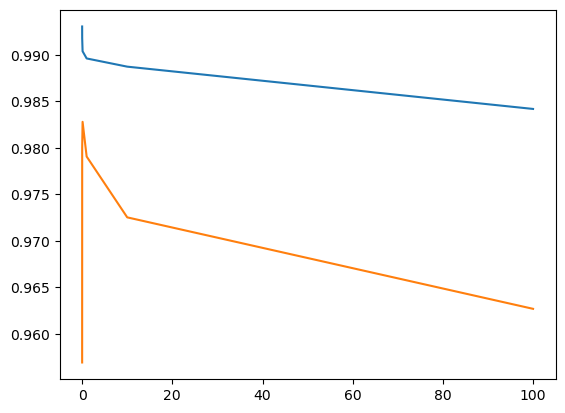

In [46]:
# 시각화

import matplotlib.pyplot as plt

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)

plt.show()

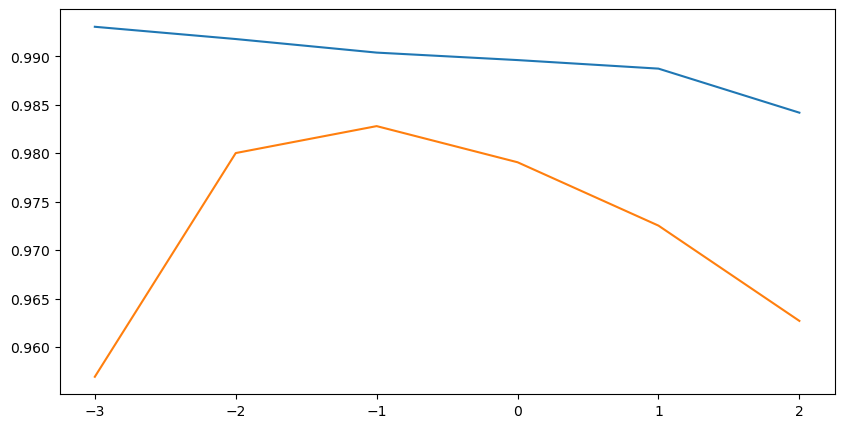

In [49]:
import numpy as np
plt.figure(figsize=(10, 5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)


---
### Lasso(L1규제) 회귀
: Lasso규제는 가중치의 절대값으로 규제하는 방법을 말한다.

In [61]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(train_scaled, train_target)
print("train score : ", lasso.score(train_scaled, train_target))
print("test score : ", lasso.score(test_scaled, test_target))

train score :  0.989789897208096
test score :  0.9800593698421884


In [62]:
train_score = []
test_score =[]

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

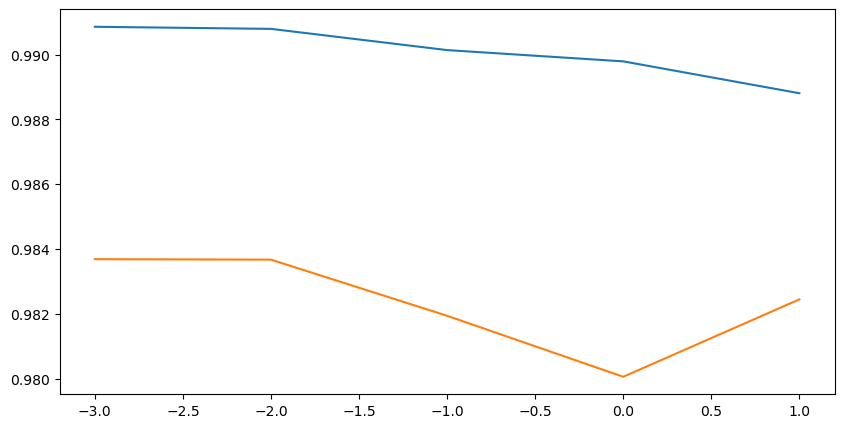

In [65]:
import numpy as np
plt.figure(figsize=(10, 5))
plt.plot(np.log10(alpha_list[:-1]), train_score[:-1])
plt.plot(np.log10(alpha_list[:-1]), test_score[:-1])

In [66]:
lasso = Lasso(10)

lasso.fit(train_scaled, train_target)
print("train score : ", lasso.score(train_scaled, train_target))
print("test score : ", lasso.score(test_scaled, test_target))

train score :  0.9888067471131867
test score :  0.9824470598706695


> lasso의 경우 기울기(가중치)를 0으로 변경하는 경우가 발생한다.


0

In [67]:
np.sum(lasso.coef_ == 0 )


40